In [1]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# reading reviews from json file
with open('/Users/akankshaagrawal/Downloads/reviews_Home_and_Kitchen_5.json') as f:
    data = ndjson.load(f)

In [3]:
reviews_df = pd.DataFrame(data)


In [4]:
reviews_df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,APYOBQE6M18AA,0615391206,Martin Schwartz,"[0, 0]",My daughter wanted this book and the price on ...,5.0,Best Price,1382140800,"10 19, 2013"
1,A1JVQTAGHYOL7F,0615391206,Michelle Dinh,"[0, 0]",I bought this zoku quick pop for my daughterr ...,5.0,zoku,1403049600,"06 18, 2014"
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,"[26, 27]",There is no shortage of pop recipes available ...,4.0,"Excels at Sweet Dessert Pops, but Falls Short ...",1367712000,"05 5, 2013"
3,A2MHCTX43MIMDZ,0615391206,"M. Johnson ""Tea Lover""","[14, 18]",This book is a must have if you get a Zoku (wh...,5.0,Creative Combos,1312416000,"08 4, 2011"
4,AHAI85T5C2DH3,0615391206,PugLover,"[0, 0]",This cookbook is great. I have really enjoyed...,4.0,A must own if you own the Zoku maker...,1402099200,"06 7, 2014"


In [5]:
reviews_df.shape


(551682, 9)

In [6]:
reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551682 entries, 0 to 551681
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      551682 non-null  object 
 1   asin            551682 non-null  object 
 2   reviewerName    546729 non-null  object 
 3   helpful         551682 non-null  object 
 4   reviewText      551682 non-null  object 
 5   overall         551682 non-null  float64
 6   summary         551682 non-null  object 
 7   unixReviewTime  551682 non-null  int64  
 8   reviewTime      551682 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 37.9+ MB


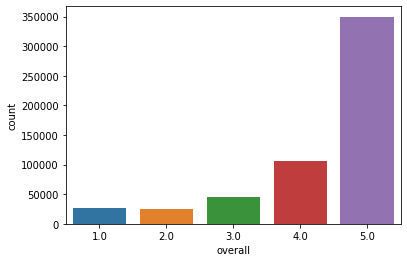

In [7]:
sns.countplot(data=reviews_df,x='overall')

In [8]:
len(reviews_df['asin'].value_counts(dropna=False))


28237

In [9]:
one_1500 = reviews_df[reviews_df['overall']==1.0].sample(n=1500)
two_500 = reviews_df[reviews_df['overall']==2.0].sample(n=500)
three_500 = reviews_df[reviews_df['overall']==3.0].sample(n=500)
four_500 = reviews_df[reviews_df['overall']==4.0].sample(n=500)
five_1500 = reviews_df[reviews_df['overall']==5.0].sample(n=1500)

In [10]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)


In [11]:
undersampled_reviews['overall'].value_counts(dropna=False)


5.0    1500
1.0    1500
4.0     500
2.0     500
3.0     500
Name: overall, dtype: int64

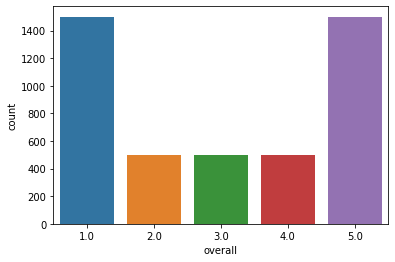

In [12]:
sns.countplot(data=undersampled_reviews, x='overall')


In [13]:
sample_100K_revs = reviews_df.sample(n=100000, random_state=42)


In [15]:
undersampled_reviews.to_csv("/Users/akankshaagrawal/Desktop/sentiment-analysis/small_corpus.csv", index=False)


In [16]:
sample_100K_revs.to_csv("/Users/akankshaagrawal/Desktop/sentiment-analysis/big_corpus.csv", index=False)
